In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importo funciones del directorio src
# from src.toolbox import test_toolbox
import src.limpieza as l

# Cargo el dataframe
df = pd.read_csv("input/covid_19_containment_measures_data.csv")

# Aplico los pasos de limpieza que he seguido en el notebook 01-limpieza usando algunas funciones
df = l.drop_nan_by_field(df, 'Country')
df = l.divide_csv_field(df, 'Keywords')
df = l.df_select_columns(df, "Country", "Date Start", "Date end intended", "Keywords")
df['Date Start'] = pd.to_datetime(df['Date Start'], format='%b %d, %Y')
df['Country'] = df['Country'].apply(lambda c: "United States" if c.startswith("US:") else c)
df['Keywords'] = df['Keywords'].apply(lambda s: s.strip())
df['Keywords'] = df['Keywords'].apply(l.normalize_keyword_field)

print("Setup completado!")

Setup completado!


In [2]:
# Al final del proceso de limpieza me quedo con al dataframe limpio.
display(df.head())

print(f"Fecha del primer evento en el dataframe: {min(df['Date Start'])}")
print(f"Fecha del ultimo eveneto en el dataframe : {max(df['Date Start'])}")

,Country,Date Start,Date end intended,Keywords
0,Austria,2020-03-16,NaN,school or university closure
1,Germany,2020-02-01,NaN,international traveller quarantine
2,Germany,2020-02-01,NaN,international traveller screening
3,United Kingdom,2020-03-20,NaN,school or university closure
4,United Kingdom,2020-03-20,NaN,school or university closure


Fecha del primer evento en el dataframe: 2019-12-18 00:00:00
Fecha del ultimo eveneto en el dataframe : 2020-04-15 00:00:00


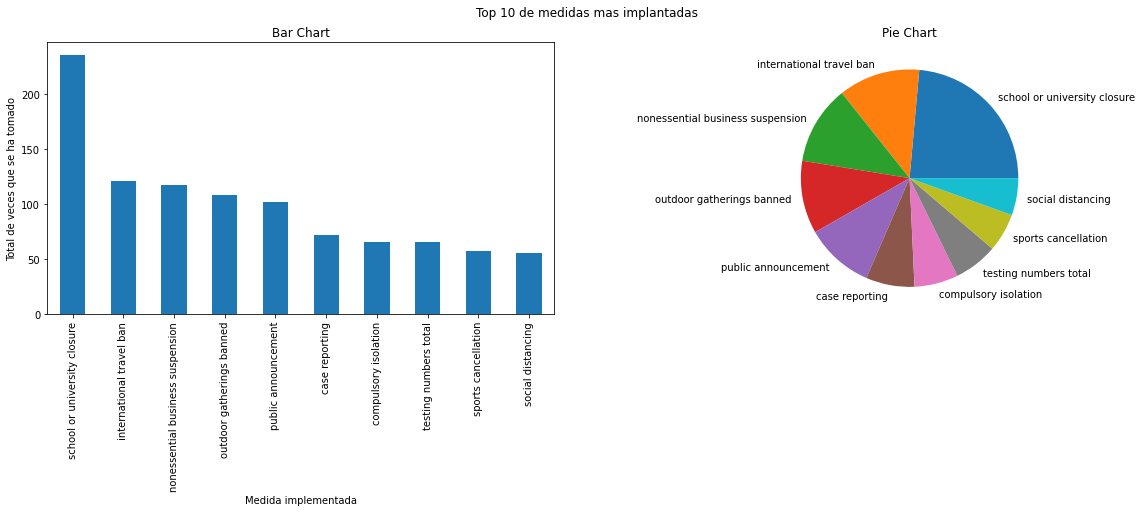

In [3]:
# Aquí podemos ver las medidas que más se han implantado:

# Creo un dataframe contando los 10 Keywords más comulnes
top_10_keywords = df[df['Keywords'] != "first case"]['Keywords'].value_counts().head(10)

# Creo el figure con unas medidas
width = 20
height = 5
plt.figure(figsize=(width, height))

# Voy a usar dos subplots

# - Uno un bar chart
plt.subplot(1, 2, 1)
top_10_keywords.plot.bar()
plt.xlabel('Medida implementada')
plt.ylabel('Total de veces que se ha tomado')
plt.title('Bar Chart')

# - Otro un pie chart
plt.subplot(1, 2, 2)
top_10_keywords.plot.pie()
plt.xlabel('')
plt.ylabel('')
plt.title('Pie Chart')

# Pongo el título global de los dos subplots
plt.suptitle('Top 10 de medidas mas implantadas')

plt.show();

<Figure size 1440x360 with 0 Axes>

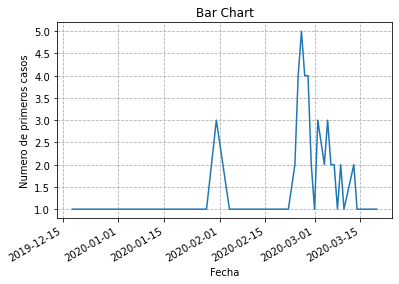

In [4]:
# Creo un grafico de lineas con los paises que tuvieron los primeros casos antes
first_cases = df[df['Keywords'] == "first case"][['Country', 'Date Start']].drop_duplicates(subset=['Country'])
first_cases = first_cases.groupby('Date Start').agg({'Country': 'count'})

# Creo el figure con unas medidas
width = 20
height = 5
plt.figure(figsize=(width, height))

# Pinto el grafico
first_cases.plot(legend=None)
plt.grid(linestyle= "--")

# Pongo etiquetas a los ejes X e Y asi como el titulo al grafico
plt.xlabel('Fecha')
plt.ylabel('Numero de primeros casos')
plt.title('Bar Chart')
plt.show();

# Vemos como van apareciendo nuevos casos entre el 2019-12-18 y el 2020-03-20.
# El día de más casos es el 2020-02-26 con cinco primeros casos


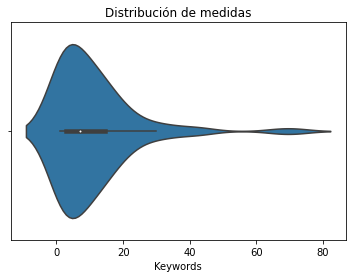

In [13]:
# Por último voy a usar un gráfico de violín para relacionar:
# - Una variable categórica: Country
# - Una variable numérica: total de medidas adoptadas

# Selecciono los Keywords únicos para cada Country deshacié
keywords_by_country = df[df['Keywords'] != "first case"][['Country', 'Keywords']]
keywords_by_country = keywords_by_country.drop_duplicates(subset=['Country','Keywords']).groupby("Country").agg({"Keywords": "count"}).sort_values(by="Keywords", ascending=False).reset_index()

# Como podemos ver la mayoría de los países ha tomado entre 0 y 10 medidas y hay pocos que hayan tomado más de 40.
# Por otro lado se observa un ligero repunte entre 60 y 80.
ax = sns.violinplot(keywords_by_country['Keywords']).set_title("Distribución de medidas")
